In [8]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read/load the dataset as a pandas Dataframe.(1 mark)
df_base = pd.read_csv("Bengaluru_House_Data.csv")
df_base

area_type   availability  ... balcony   price
0      Super built-up  Area         19-Dec  ...     1.0   39.07
1                Plot  Area  Ready To Move  ...     3.0  120.00
2            Built-up  Area  Ready To Move  ...     3.0   62.00
3      Super built-up  Area  Ready To Move  ...     1.0   95.00
4      Super built-up  Area  Ready To Move  ...     1.0   51.00
...                     ...            ...  ...     ...     ...
13315        Built-up  Area  Ready To Move  ...     0.0  231.00
13316  Super built-up  Area  Ready To Move  ...     NaN  400.00
13317        Built-up  Area  Ready To Move  ...     1.0   60.00
13318  Super built-up  Area         18-Jun  ...     1.0  488.00
13319  Super built-up  Area  Ready To Move  ...     1.0   17.00

[13320 rows x 9 columns]

In [3]:
#2. Print/show the dimensions of Dataframe i.e., no of rows and columns. (1 mark)

df_base.shape

(13320, 9)

In [4]:
#3. Print/show the data types of all the features/columns. (1 mark)
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
#4. Print/show statistical summary of all the numeric featurs. (1 mark)
df_base.select_dtypes(include=np.number).describe()

bath       balcony         price
count  13247.000000  12711.000000  13320.000000
mean       2.692610      1.584376    112.565627
std        1.341458      0.817263    148.971674
min        1.000000      0.000000      8.000000
25%        2.000000      1.000000     50.000000
50%        2.000000      2.000000     72.000000
75%        3.000000      2.000000    120.000000
max       40.000000      3.000000   3600.000000

In [6]:
#5. Print/show statistical summary for all the categorical variable. (2 marks)
df_base.select_dtypes(include='object').describe()

area_type   availability  ...  society total_sqft
count                  13320          13320  ...     7818      13320
unique                     4             81  ...     2688       2117
top     Super built-up  Area  Ready To Move  ...  GrrvaGr       1200
freq                    8790          10581  ...       80        843

[4 rows x 6 columns]

In [7]:
#6. Find out Feature wise Missing value counts. (2 marks)
df_base.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

# EDA

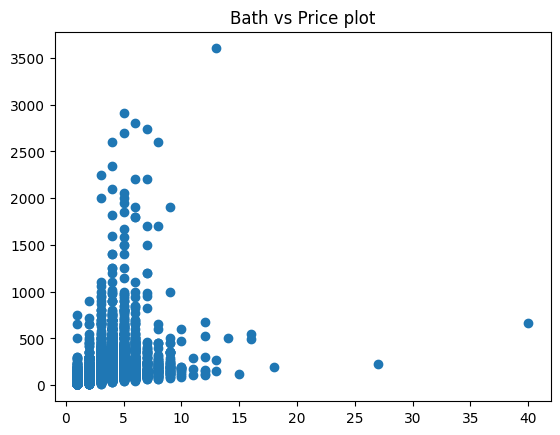

In [9]:
#1. Show/Visualize the relationship between fetures 'bath' and 'price' using scattered plot. (1 marks)
plt.scatter(df_base['bath'].values, df_base['price'].values)
plt.title("Bath vs Price plot")
plt.show()

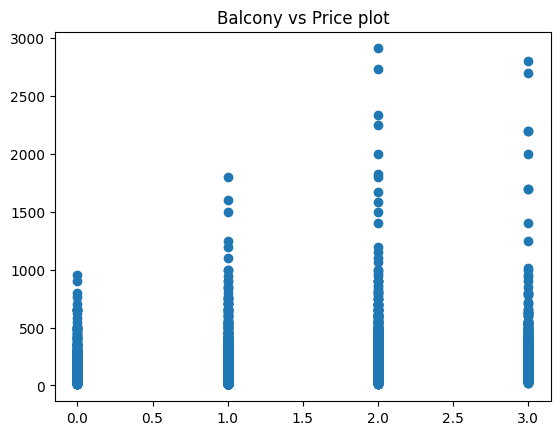

In [10]:
#2. Show/Visualize the relationship between fetures 'balcony'and 'price' using scattered plot. (1 mark)
plt.scatter(df_base['balcony'].values, df_base['price'].values)
plt.title("Balcony vs Price plot")
plt.show()

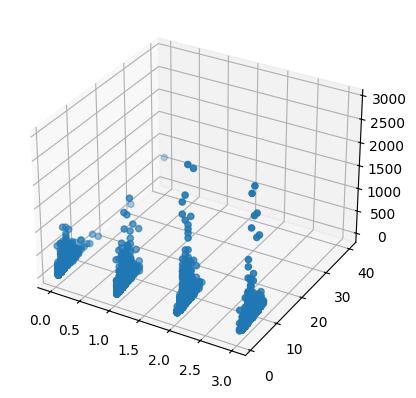

In [15]:
#show/Visualize the relationship between features 'bath','balcony' and 'price' using 3D Scatterplot. (2 marks)
ax = plt.axes(projection='3d')
ax.scatter(df_base['balcony'].values, df_base['bath'].values, df_base['price'].values)

<Axes: >

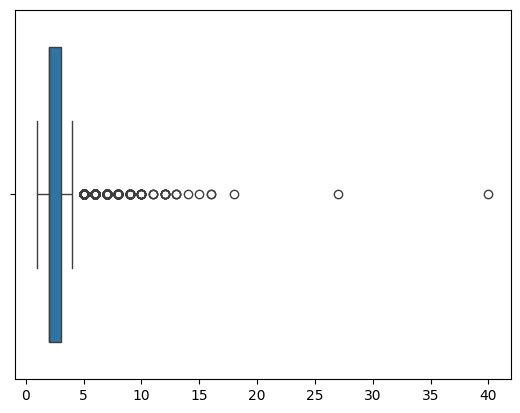

In [18]:
#Show outliers distribution of variable 'bath' by drawing Boxplot. (3marks)
sns.boxplot(x=df_base['bath'].values)

# Preprocessing Dataframe

In [19]:
#1. Replace missing values of the feature 'balcony' with numerical value 0 and convert its feature type to int.(2 marks)
df_base.balcony.fillna(0, inplace=True)
df_base['balcony'] = df_base['balcony'].astype(int)
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       13320 non-null  int32  
 8   price         13320 non-null  float64
dtypes: float64(2), int32(1), object(6)
memory usage: 884.7+ KB


In [20]:
#2. Replace missing values of the feature 'bath' missing values with numerical 1 and convert feature type to int.(2 marks)
df_base.bath.fillna(1, inplace=True)
df_base['bath'] = df_base['bath'].astype(int)
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13320 non-null  int32  
 7   balcony       13320 non-null  int32  
 8   price         13320 non-null  float64
dtypes: float64(1), int32(2), object(6)
memory usage: 832.6+ KB


In [21]:
#3. Replace missing values of the feature 'location' with a constant "missing".(2 marks)
df_base.location.fillna('missing', inplace=True)
df_base.isnull().sum()

area_type          0
availability       0
location           0
size              16
society         5502
total_sqft         0
bath               0
balcony            0
price              0
dtype: int64

In [22]:
#4. Replace missing values of the feature 'society' with a constant "missing".(2 marks)
df_base.society.fillna('missing', inplace=True)
df_base.isnull().sum()

area_type        0
availability     0
location         0
size            16
society          0
total_sqft       0
bath             0
balcony          0
price            0
dtype: int64

In [27]:
#5. Convert the feature 'size' to int by removing alphabetic content and keep only numeric content.
#In case of missing/null content replace by constant numeric value- 2. (3 marks)
df_base['size'].fillna('2', inplace=True)
df_base['size'] = df_base['size'].apply(lambda x: int(x) if(str(x).isalnum()) else int(2))
df_base.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [29]:
#6. Convert the feature 'total_sqft' to numerical using 'to_numeric' method. 
#Also, replace all its missing entries by mean.(3 marks)

df_base['total_sqft'] = pd.to_numeric(df_base['total_sqft'], errors="coerce")


In [30]:
df_base.total_sqft.fillna(df_base.total_sqft.mean(), inplace=True)

In [32]:
lb_enc = LabelEncoder()
df_base['avilability_encoded'] = lb_enc.fit_transform(df_base['availability'])
df_base['location_encoded'] = lb_enc.fit_transform(df_base['location'])
df_base['society_encoded'] = lb_enc.fit_transform(df_base['society'])

In [35]:
df_base = pd.get_dummies(df_base, columns=['area_type'], dtype=int)

In [36]:
df_base.dtypes

availability                       object
location                           object
size                                int64
society                            object
total_sqft                        float64
bath                                int32
balcony                             int32
price                             float64
avilability_encoded                 int32
location_encoded                    int32
society_encoded                     int32
area_type_Built-up  Area            int32
area_type_Carpet  Area              int32
area_type_Plot  Area                int32
area_type_Super built-up  Area      int32
dtype: object

In [37]:
df_base.drop(columns=['availability', 'location', 'society'], axis=1, inplace=True)

In [38]:
df_base.dtypes

size                                int64
total_sqft                        float64
bath                                int32
balcony                             int32
price                             float64
avilability_encoded                 int32
location_encoded                    int32
society_encoded                     int32
area_type_Built-up  Area            int32
area_type_Carpet  Area              int32
area_type_Plot  Area                int32
area_type_Super built-up  Area      int32
dtype: object

In [39]:
#1. Split the processed Dataframe into 2 parts train and test with ratio as 70:30. 
#Ensure feature 'price' as target(y). (3 marks)

from sklearn.model_selection import train_test_split

In [40]:
target = df_base['price']
X = df_base.drop(columns='price', axis=1)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=100)

In [43]:
X_train.shape

(9324, 11)

In [45]:
#2. Use OLS statsmodels package to build the Linear Regression model on the train set. 
#Also,generate the summary report. (6 marks)

lr = sm.OLS(y_train, X_train)
lr = lr.fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     672.4
Date:                Thu, 01 Aug 2024   Prob (F-statistic):               0.00
Time:                        21:10:01   Log-Likelihood:                -57720.
No. Observations:                9324   AIC:                         1.155e+05
Df Residuals:                    9314   BIC:                         1.155e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
size                              -9.6089      3.742     -2.568      0.010     -16.945      -2.273
total_sqft                         0.0536      0.001     52.884      0.000       0.052       0.056
bath                              24.9910      1.037     24.089      0.000      22.957      27.025
balcony                           -2.0032      1.453     -1.379      0.168      -4.851       0.845
avilability_encoded                0.0292      0.067      0.435      0.663      -0.102       0.161
location_encoded                  -0.0053      0.003     -1.578      0.115      -0.012       0.001
society_encoded                   -0.0027      0.001     -1.853      0.064      -0.006       0.000
area_type_Built-up  Area         -17.8472      4.489     -3.976      0.000     -26.647      -9.047
area_type_Carpet  Area           -12.0749     12.347     -0.978      0.328     -36.277      12.127
area_type_Plot  Area              43.3007      4.804      9.014      0.000      33.885      52.717
area_type_Super built-up  Area   -18.1830      4.127     -4.405      0.000     -26.274     -10.092
==============================================================================
Omnibus:                    10967.768   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         11779835.612
Skew:                           5.363   Prob(JB):                         0.00
Kurtosis:                     176.800   Cond. No.                     9.33e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.18e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [60]:
#linear reg model
from sklearn.linear_model import LinearRegression

sk_lr = LinearRegression()
sk_lr = sk_lr.fit(X_train, y_train)

In [64]:
print(sk_lr.score(X_train, y_train))

0.3938404994201684


In [65]:
sk_lr.coef_

array([ 0.00000000e+00,  5.35952464e-02,  2.49910307e+01, -2.00317425e+00,
        2.91820156e-02, -5.28943682e-03, -2.74964310e-03, -1.66460872e+01,
       -1.08738335e+01,  4.45017652e+01, -1.69818445e+01])

In [67]:
#Train below models and obtain values using 5 fold cross validation on train data and 'RMSE' metric. 
#Find the metric (RMSE) score in test set and suggest the best model
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [70]:
score = cross_val_score(estimator=LinearRegression(), X=X_train, y=y_train, cv=5, scoring='r2')
print(score)

[0.32336451 0.28696008 0.44585018 0.40581    0.44999198]


In [71]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [73]:
ridge = Ridge(alpha=1, max_iter=500)
ridge = ridge.fit(X_train, y_train)

In [80]:
r_score = cross_val_score(estimator=ridge, X=X_train, y=y_train, cv=5, scoring='r2')
r_rmse = np.sqrt(mean_squared_error(y_test, ridge.predict(X_test)))
print(r_score, np.mean(r_score), r_rmse)

[0.32336451 0.28696008 0.44585018 0.40581    0.44999198] 0.38239534940892783 106.32592129110405


In [84]:
#Lasso (alpha = 0.01, max_iter = 500) (5 marks)

lasso = Lasso(alpha=0.01, max_iter=500)
lasso.fit(X_train, y_train)
l_score = cross_val_score(estimator=lasso, X=X_train, y=y_train, cv=5, scoring='r2')
l_rmse = np.sqrt(mean_squared_error(y_test, lasso.predict(X_test)))
print(l_score, np.mean(l_score), l_rmse)

[0.32338608 0.2869651  0.44587547 0.40581076 0.4499723 ] 0.38240194098873914 106.32402648762488


In [83]:
#- ElasticNet(alpha = 0.1, l1_ratio = 0.01, max_iter = 500) (5 marks)
el_net = ElasticNet(alpha=0.1, l1_ratio=0.01, max_iter=500)
el_net.fit(X_train, y_train)
el_score = cross_val_score(estimator=el_net, X=X_train, y=y_train, cv=5, scoring='r2')
el_rmse = np.sqrt(mean_squared_error(y_test, el_net.predict(X_test)))
print(el_score, np.mean(el_score), el_rmse)

[0.32235242 0.28415029 0.44541391 0.40597279 0.44411085] 0.38040005305978186 106.5389095569847


In [86]:
#Using Random search on Lasso model find the best value of alpha and corresponding RMSE value on test set
from sklearn.model_selection import RandomizedSearchCV

tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20],
                     'max_iter':[10,50,100,150,200,250,300,400,500]}]
rsearch = RandomizedSearchCV(estimator=Lasso(), param_distributions=tuned_paramaters, scoring='r2')

In [88]:
rsearch = rsearch.fit(X_train, y_train)

C:\Users\priya\anaconda3\envs\AlgoTrading\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.035e+07, tolerance: 1.728e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\priya\anaconda3\envs\AlgoTrading\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.966e+06, tolerance: 1.654e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\priya\anaconda3\envs\AlgoTrading\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

In [89]:
rsearch.score(X_train, y_train)

0.3938402115457934

In [90]:
rsearch.best_params_

{'max_iter': 50, 'alpha': 0.01}